In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import requests
from selenium import webdriver
import json
from retrying import retry

In [16]:
@retry(stop_max_delay=10000)
def get_data(country):
    driver = webdriver.PhantomJS()
    driver.implicitly_wait(5)
    oecd_base_url = "http://www.oecdbetterlifeindex.org/countries/"
    
    driver.get("".join([oecd_base_url, country]))
    
    topics = driver.find_element_by_css_selector('div#topics')
    
    results = {}
    for t in topics.find_elements_by_css_selector('div.minichart'):
        if t.find_elements_by_css_selector('div.value'):
            a = t.text.split('\n')
            results[a[0]] = float(a[1])

    return results

In [18]:
# Load list of countries
with open('data/oecddata/countries.dat', 'r') as f:
    list_of_countries = f.read().splitlines()

In [19]:
# Get data from OECD
data = {}
for c in list_of_countries:
    c_path = c.lower().replace(' ', '-')
    d = get_data(c_path)
    data[c] = d

In [22]:
# Dump to json file
with open('data/oecddata/result.json', 'w') as f:
    json.dump(data, f)

In [23]:
# Create dataframe
df = pd.DataFrame.from_dict(data, orient='index')

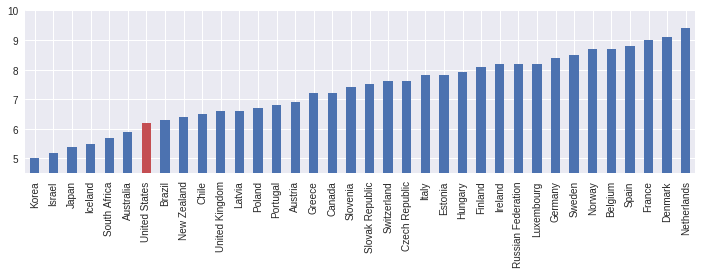

In [24]:
# Plot
colors = [sns.color_palette()[0]] * len(df)
colors[6] = sns.color_palette()[2]
df.sort_values('Work-Life Balance').iloc[2:].plot(kind='bar',
                                                  ylim=(4.5,10),
                                                  figsize=(12,3),
                                                  y='Work-Life Balance',
                                                  legend=False,
                                                  color=colors)
#plt.savefig('visualization/fig_oecd01.svg', bbox_inches='tight')

In [25]:
df

,Jobs,Housing,Civic engagement,Community,Environment,Life Satisfaction,Health,Income,Safety,Education,Work-Life Balance
Australia,8.4,7.4,8.6,8.5,9.7,8.9,9.4,5.2,7.2,8.0,5.9
Austria,8.3,5.8,3.9,7.4,7.6,8.1,7.7,5.2,9.1,6.9,6.9
Belgium,7.3,6.7,7.1,5.6,5.8,7.4,8.1,5.8,7.8,7.5,8.7
Brazil,6.2,3.5,4.3,6.3,5.1,6.1,6.6,0.6,0.0,1.9,6.3
Canada,8.4,7.6,6.4,8.0,7.9,9.3,9.6,5.6,9.0,7.2,7.2
Chile,6.1,4.4,1.3,3.1,4.6,6.1,6.3,1.4,5.4,4.3,6.5
Czech Republic,6.7,4.5,4.6,6.5,6.7,6.3,6.3,2.1,7.9,7.6,7.6
Denmark,8.5,5.7,6.6,8.7,8.7,9.7,7.8,4.4,9.5,8.2,9.1
Estonia,6.4,5.3,5.5,6.4,8.0,2.7,5.5,1.6,6.9,8.2,7.8
Finland,7.8,6.2,5.2,8.1,9.4,9.4,7.3,3.7,9.4,9.3,8.1
